In [36]:
import matplotlib.pyplot as plt
import numpy 
import math


In [37]:
#initialize the variables

r = 0.15 #radius of wheels in m
l = 0.30 #length of wheel to CoG in m

t = 15 #total time in seconds for simulation

#rotational inputs of each wheel (in rad/s):

w1 = -1.5
w2 = 2.0
w3 = 1.0

n = 30 #number of data points
theta_0 = 0 #initial angle of robot in radians
x_0 = 0 #initial x position
y_0 = 0 #initial y position

tstep = t/n #change for more or less timesteps

In [38]:
ang_vel = r / l * (w1 + w2 + w3) #calculate angular velocity
#print(ang_vel)

#Displacements on the plot. n + 1 to accommodate initial positions 
x_plot = numpy.empty(n+1,dtype=object)
y_plot = numpy.empty(n+1,dtype=object)
ang_dis = numpy.empty(n+1,dtype=object)

#x_plot[0] = x_0
#y_plot[0] = y_0
#ang_dis[0] = 0

#initialize and fill time array
t_array = [x * tstep for x in range(0, n + 1)]

#print(len(t_array))
#print(t_array)

for i, val in enumerate(t_array):
    #equations, note that sine function in radians:
    #print(i)
    ang_dis[i] = ang_vel * tstep * i  
    #print(ang_dis[i])
    
    if i < 1: #for the initial value
        x_plot[i] = 0
        y_plot[i] = 0
    else: #fix an error for having extra array list
        x_velc = r * (w1*math.cos(ang_dis[i-1] ) + w2*math.cos(ang_dis[i-1] +2*math.pi/3) +w3*math.cos(ang_dis[i-1] +4*math.pi/3))
        y_velc = r * (w1*math.sin(ang_dis[i-1] ) + w2*math.sin(ang_dis[i-1] +2*math.pi/3) +w3*math.sin(ang_dis[i-1] +4*math.pi/3))
        x_plot[i] = x_velc * tstep + x_plot[i-1]
        #print(x_plot[i])
        y_plot[i] = y_velc * tstep + y_plot[i-1]
        #print(y_plot[i])
        #print(val)


[0 -0.22499999999999998 -0.45815431354753755 -0.6670580452229722
 -0.8226767608152683 -0.9033818310815062 -0.8979564815086165
 -0.8071547529841536 -0.6435967016073922 -0.4300144032694503
 -0.19609254162820217 0.025657310412054324 0.2044153037335795
 0.31533680222018245 0.3430054084500958 0.2835756079327427
 0.1453072370025785 -0.05258250851990223 -0.28258997060365115
 -0.5127476182124424 -0.7110670468114711 -0.8499848789720623
 -0.9101936536629651 -0.8833252690141464 -0.7731140209148484
 -0.5948775928099354 -0.3733881312011378 -0.13942929490556874
 0.07448220425915858 0.23861592873852633 0.330159792855614]
[0 0.06495190528383292 0.04297882916380549 -0.06286530573311742
 -0.23786977812569388 -0.4577116340888421 -0.6918362068743829
 -0.9077037498190547 -1.0753119651005159 -1.1713658657848836
 -1.1825154239058473 -1.107211020846502 -0.9559188207049826
 -0.7496661330291936 -0.5171189373262697 -0.29059774889024803
 -0.10158555986446449 0.023647816745159173 0.06769685062551598
 0.02443939754

Text(0, 0.5, 'Y-direction (m)')

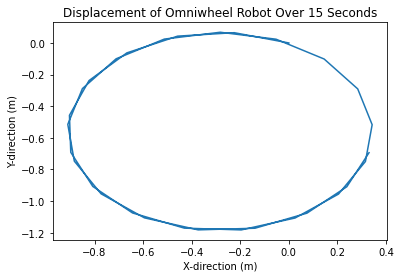

In [39]:
print(x_plot)
print(y_plot)
plt.plot(x_plot, y_plot) #plot displacement

plt.title("Displacement of Omniwheel Robot Over 15 Seconds")
plt.xlabel("X-direction (m)")
plt.ylabel("Y-direction (m)")

Text(0, 0.5, 'Angle/Heading (radians)')

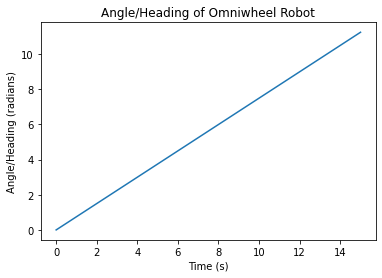

In [40]:
plt.plot(t_array, ang_dis) #plot angle displacement

plt.title("Angle/Heading of Omniwheel Robot")
plt.xlabel("Time (s)")
plt.ylabel("Angle/Heading (radians)")

In [11]:
#pwd